In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/titanic-training-data.csv")

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#drop the column Cabin as it has lots of missing values
df.drop(["Cabin"],axis=1,inplace=True)

In [11]:
df.shape

(891, 11)

In [12]:
median1=df["Age"].median()
median1

28.0

In [13]:
df["Age"].replace(np.nan,median1,inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
#Embark is object datatype and can be replaced y MODE
mode1=df["Embarked"].mode().values[0]
mode1

'S'

In [16]:
df["Embarked"].replace(np.nan,mode1,inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
#Encoding
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
dummies=pd.get_dummies(df[['Sex','Embarked','Pclass']])
dummies
#there is no benefit in encoding the name column, all the names are DIFFERENT

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1
...,...,...,...,...,...,...
886,2,0,1,0,0,1
887,1,1,0,0,0,1
888,3,1,0,0,0,1
889,1,0,1,1,0,0


In [20]:
#Bcoz of the name and ticket purchased the person survival can not be judged
#also the name and ticket are all different
#unwanted columns is better to be dropped
columns_nr=["Name","Ticket","PassengerId"]
df.drop(columns_nr,axis=1,inplace=True)

In [21]:
columns=['Sex','Embarked','Pclass']

In [22]:
df=pd.concat([df,dummies],axis=1)

In [23]:
df.drop(columns,axis=1,inplace=True)

In [24]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


All attributes are of numerical type

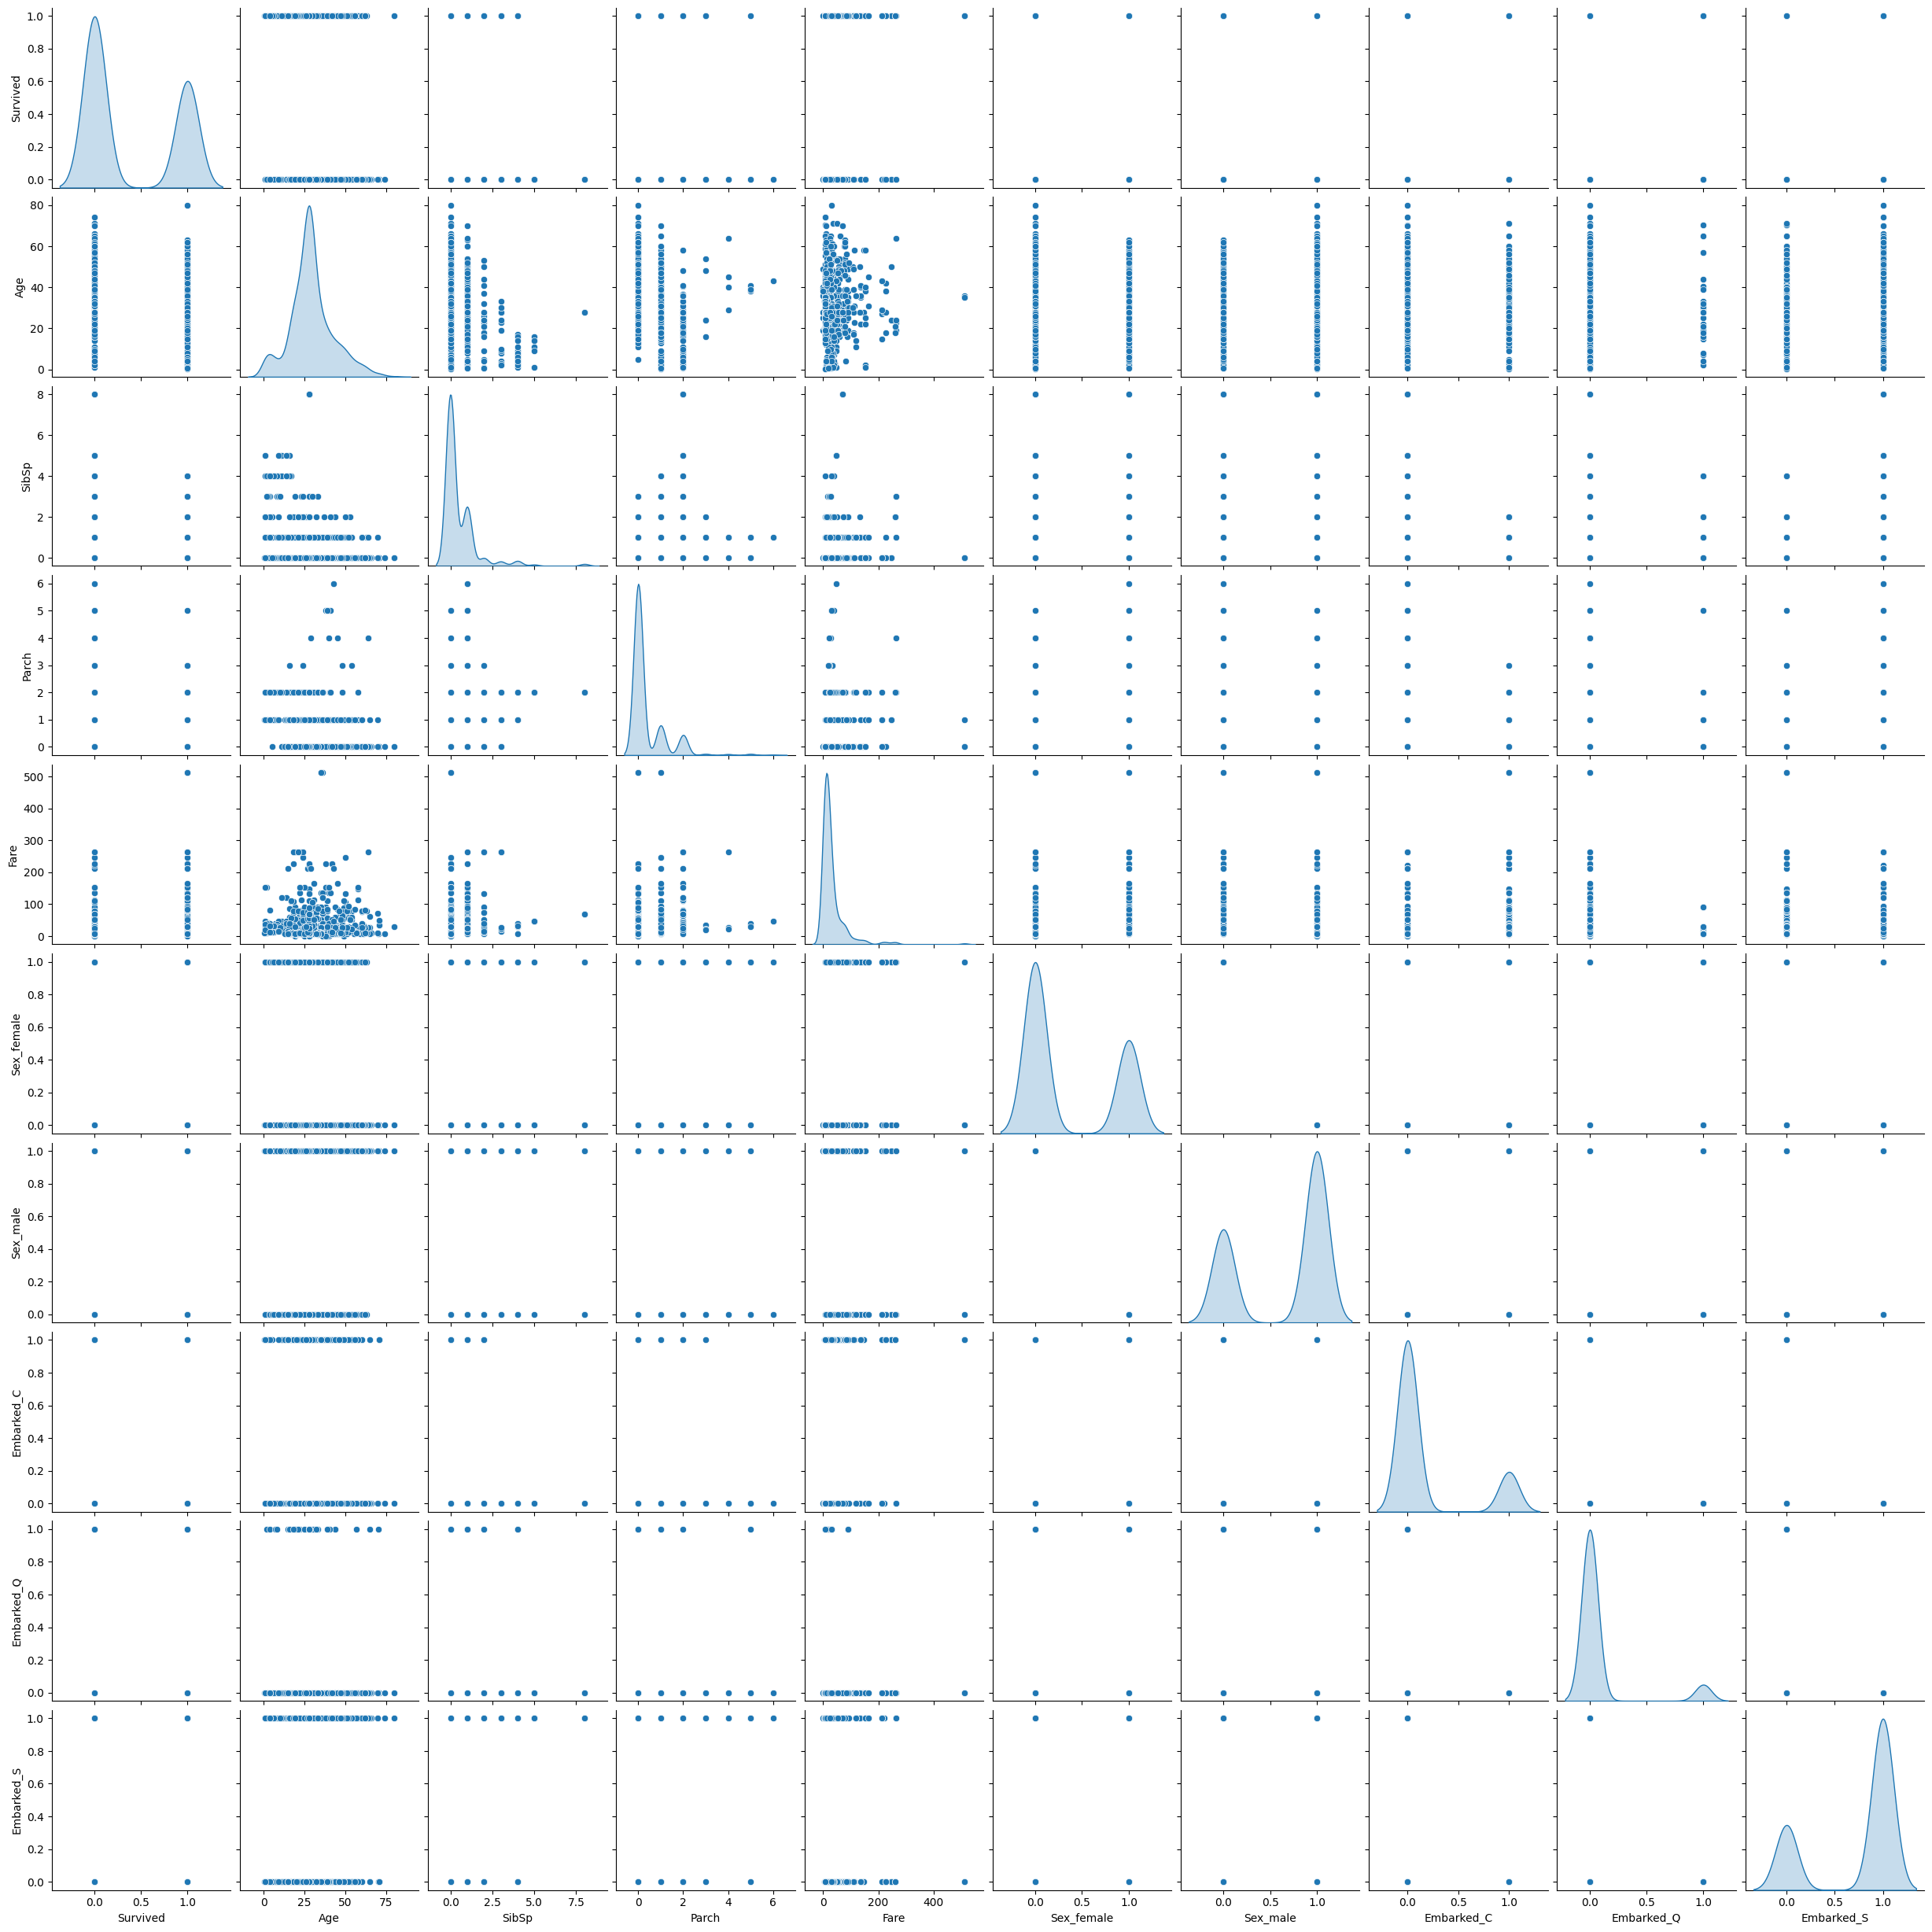

In [26]:
sns.pairplot(df,diag_kind="kde")

In [27]:
#Problem statement is whether the person is survivied or not 
#D.V is Survived
x=df.drop(["Survived"],axis=1)

y=df[["Survived"]]

In [28]:
#SPLIT X & y into training and test set in 70:30 ratio

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.score(x_train,y_train)

0.8073836276083467

In [31]:
model.score(x_test,y_test)

0.7611940298507462

Using Metrics:
Confusion matrix,FP,FN,TP,TN,Accuracy,precission and Recall

In [37]:
predictions=model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7611940298507462

In [39]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       172
           1       0.66      0.68      0.67        96

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[139,  33],
       [ 31,  65]])

In [43]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.81      0.81       172\n           1       0.66      0.68      0.67        96\n\n    accuracy                           0.76       268\n   macro avg       0.74      0.74      0.74       268\nweighted avg       0.76      0.76      0.76       268\n'

<Axes: >

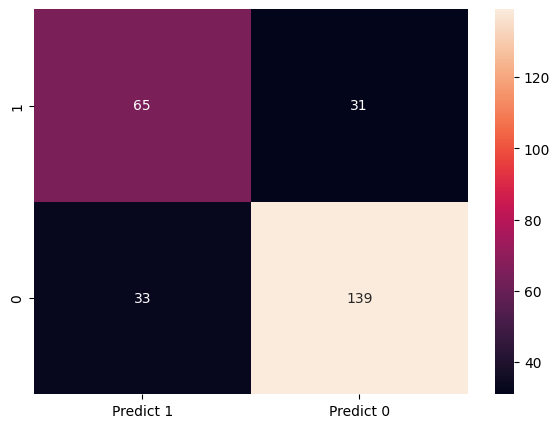

In [47]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

on vertical axis=Actual Value

on Horizontal axis= Predicted value

#[ TP FN
 
 # FP TN ]